In [1]:
library(lmerTest) #lmer
library(ggplot2) #ylim in plot
library(emmeans)
library(dplyr) #%>%
library(sjPlot) #tab_model
#library(glmmTMB)
#library(DHARMa) #sim

Warning message:
"package 'lmerTest' was built under R version 3.6.3"
Loading required package: lme4

Warning message:
"package 'lme4' was built under R version 3.6.3"
Loading required package: Matrix

Warning message:
"package 'Matrix' was built under R version 3.6.3"

Attaching package: 'lmerTest'


The following object is masked from 'package:lme4':

    lmer


The following object is masked from 'package:stats':

    step


Warning message:
"package 'dplyr' was built under R version 3.6.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Install package "strengejacke" from GitHub (`devtools::install_github("strengejacke/strengejacke")`) to load all sj-packages at once!



In [2]:
#sessionInfo()
#contrast: https://cran.r-project.org/web/packages/emmeans/vignettes/comparisons.html

In [3]:
#focal birds information (one row per focal bird)
path_ = 'G:/VPHI/Welfare/2- Research Projects/OFHE2.OriginsE2/DataOutput/TrackingSystem/ALLDATA_'
path_save = file.path(path_, '0FH_HA')
dir.create(path_save)
#df = read.csv(file.path(path_,'df_daily_aggregatedHA.csv'), header = TRUE, sep = ",")
df = read.csv(file.path(path_,'OFH_df_HA.csv'), header = TRUE, sep = ",")
df$HenID = as.factor(df$HenID)   
df$PenID = as.factor(df$PenID)
df$CLASS = as.factor(df$CLASS) 
df$date = as.factor(df$date) 
df$DOA = as.integer(df$DOA) 
df$Treatment = as.factor(df$Treatment)
#df$dateTreatment = interaction(df$DOA, df$Treatment)
#df$dateTreatment = as.factor(df$dateTreatment)
df = df %>% mutate(CLASS = relevel(CLASS, ref = "REXP"))
df = df %>% mutate(Treatment = relevel(Treatment, ref = "TRAN"))
dim(df)
df = df[!is.na(df$DOA),]
head(df,3)

Warning message in dir.create(path_save):
"'G:\VPHI\Welfare\2- Research Projects\OFHE2.OriginsE2\DataOutput\TrackingSystem\ALLDATA_\0FH_HA' existe déjà"


[1] 844   8

,CLASS,date,Treatment,HenID,severity,FeatherDamage,DOA,PenID
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<fct>
1,REXP,2020-11-23,OFH,hen_164,0,NA,173,pen9
2,REXP,2021-02-01,OFH,hen_181,16,14,243,pen9
3,REXP,2021-02-01,OFH,hen_82,4,8,243,pen5


In [4]:
unique(df['date'])

,date
,<fct>
1,2020-11-23
2,2021-02-01
5,2021-01-04
6,2021-07-25
23,2021-04-12


In [5]:
#TO READ: https://cran.r-project.org/web/packages/emmeans/vignettes/comparisons.html

# KBF severity

[1] 844   8

[1] 669   8

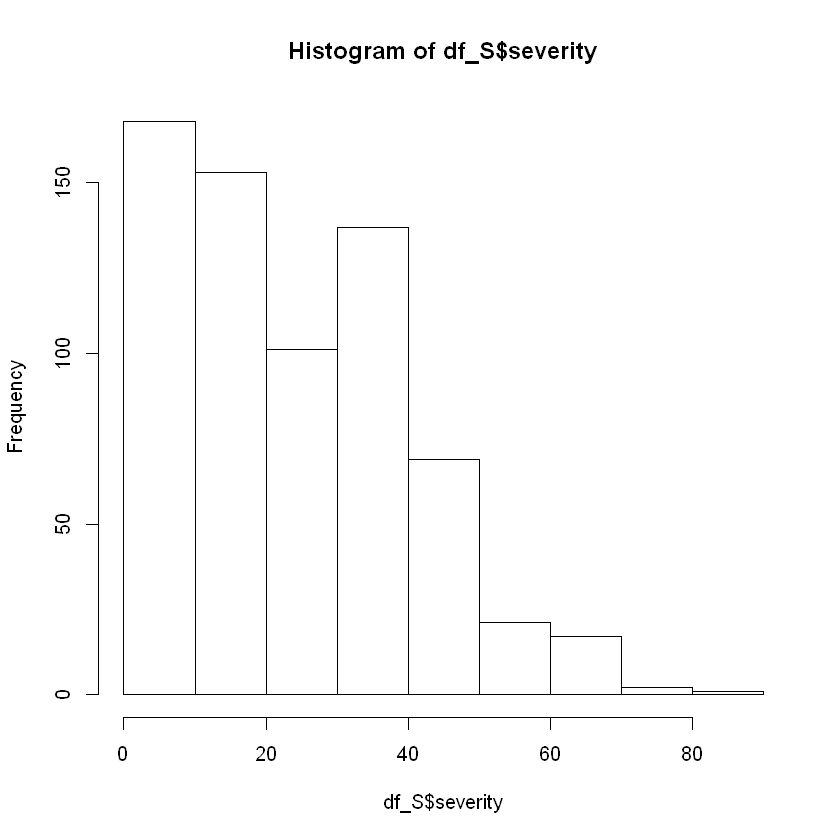

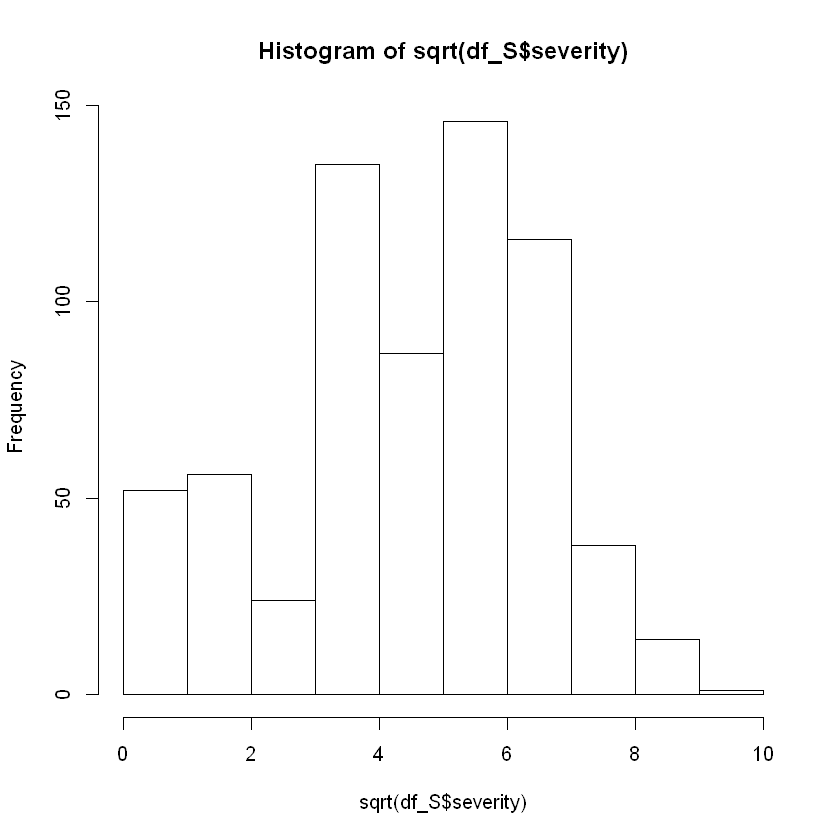

In [6]:
dim(df)
df_S = df[(!is.na(df$severity))&(df$DOA>200),]
dim(df_S)
hist(df_S$severity)
hist(sqrt(df_S$severity))

boundary (singular) fit: see ?isSingular



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: sqrt(severity) ~ CLASS + date * Treatment + (1 | PenID/HenID)
   Data: df_S

REML criterion at convergence: 2505.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.9683 -0.4582  0.0180  0.5533  3.2319 

Random effects:
 Groups      Name        Variance  Std.Dev. 
 HenID:PenID (Intercept) 1.831e+00 1.353e+00
 PenID       (Intercept) 1.082e-13 3.289e-07
 Residual                1.545e+00 1.243e+00
Number of obs: 669, groups:  HenID:PenID, 194; PenID, 8

Fixed effects:
                             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)                   2.85947    0.21379 398.34309  13.375  < 2e-16 ***
CLASSLEXP                     0.09836    0.30502 180.73247   0.322  0.74746    
CLASSMEXP                    -0.16463    0.27799 182.00774  -0.592  0.55443    
date2021-02-01                0.79854    0.19338 474.63605   4.129  4.3e-05 ***
date2021-04-12     

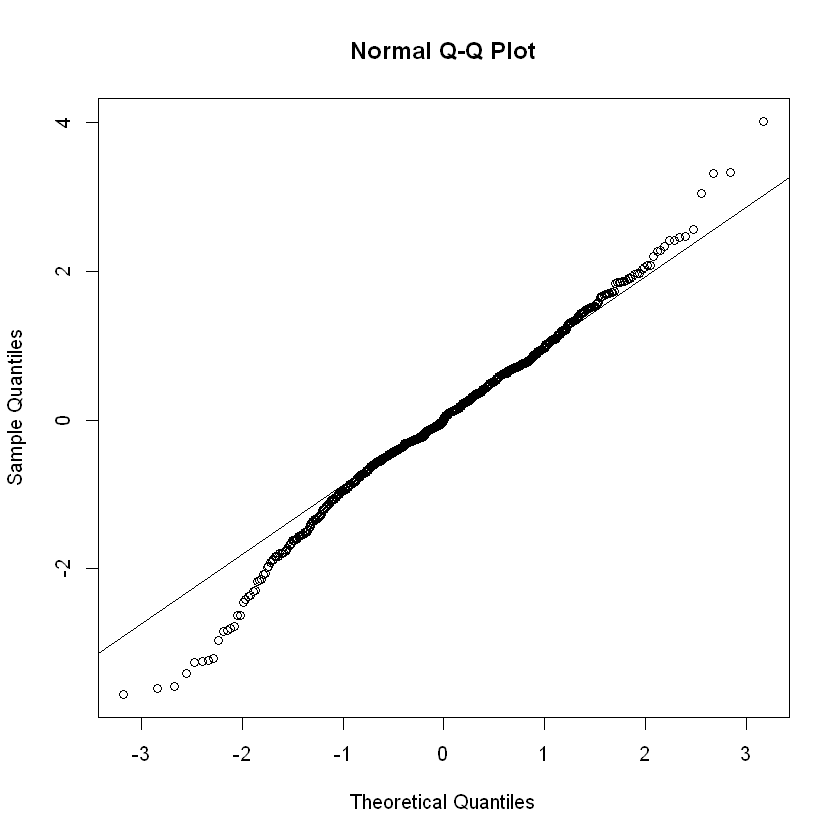

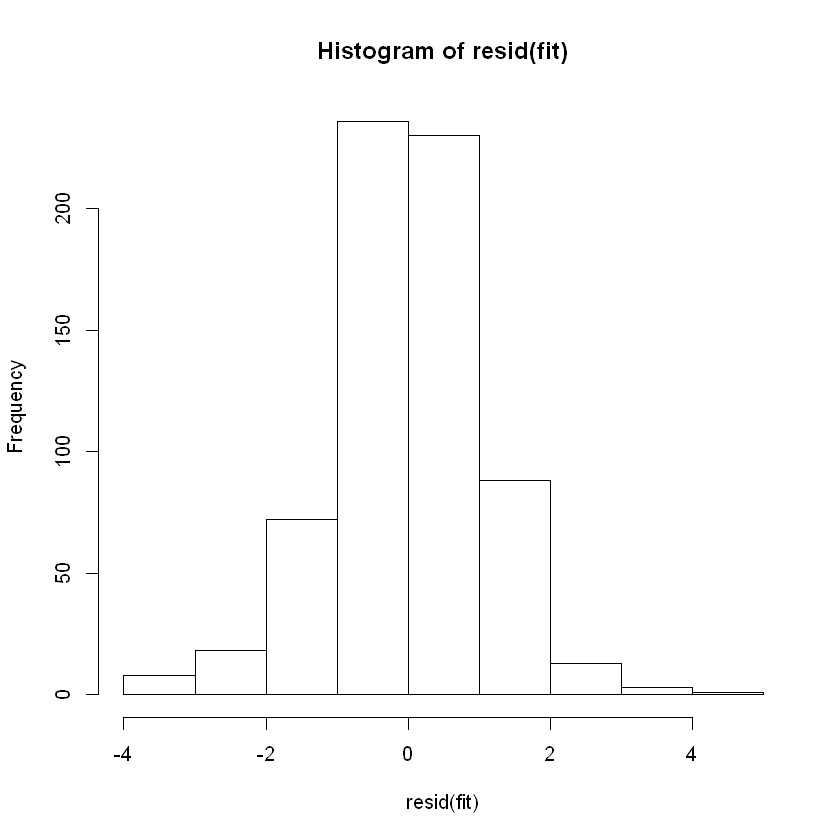

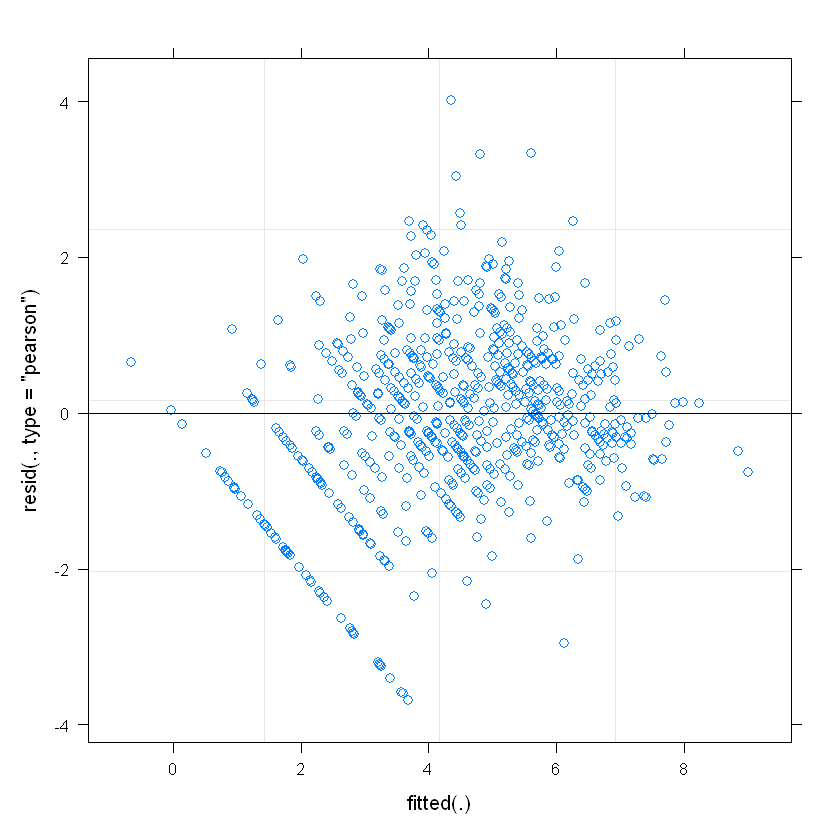

In [7]:
#sqrt is better. penid no variance
#penID as random effect: singular values
fit = lmer(sqrt(severity) ~ CLASS + date*Treatment+(1|PenID/HenID), data=df_S)
summary(fit)
######normally distributed residuals
qqnorm(resid(fit))
qqline(resid(fit))
hist(resid(fit))
######check homogeneity of variance (residuals has constant variance)
plot(fit)
#isnt it comapred to the ref group?

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: sqrt(severity) ~ CLASS + date * Treatment + (1 | HenID)
   Data: df_S

REML criterion at convergence: 2505.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.9683 -0.4582  0.0180  0.5533  3.2319 

Random effects:
 Groups   Name        Variance Std.Dev.
 HenID    (Intercept) 1.831    1.353   
 Residual             1.545    1.243   
Number of obs: 669, groups:  HenID, 194

Fixed effects:
                             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)                   2.85947    0.21379 398.34303  13.375  < 2e-16 ***
CLASSLEXP                     0.09836    0.30502 180.73245   0.322  0.74746    
CLASSMEXP                    -0.16463    0.27799 182.00772  -0.592  0.55443    
date2021-02-01                0.79854    0.19338 474.63606   4.129  4.3e-05 ***
date2021-04-12                1.82948    0.19727 489.11893   9.274  < 2e-16 ***
date2021-07-25       

,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
CLASS,0.8748955,0.4374477,2,180.5951,0.2831208,7.537625e-01
date,619.1837467,206.3945822,3,483.6094,133.5807737,4.894618e-63
Treatment,9.7301649,9.7301649,1,189.5087,6.2974665,1.292888e-02
date:Treatment,6.6382615,2.2127538,3,483.7192,1.4321179,2.325987e-01


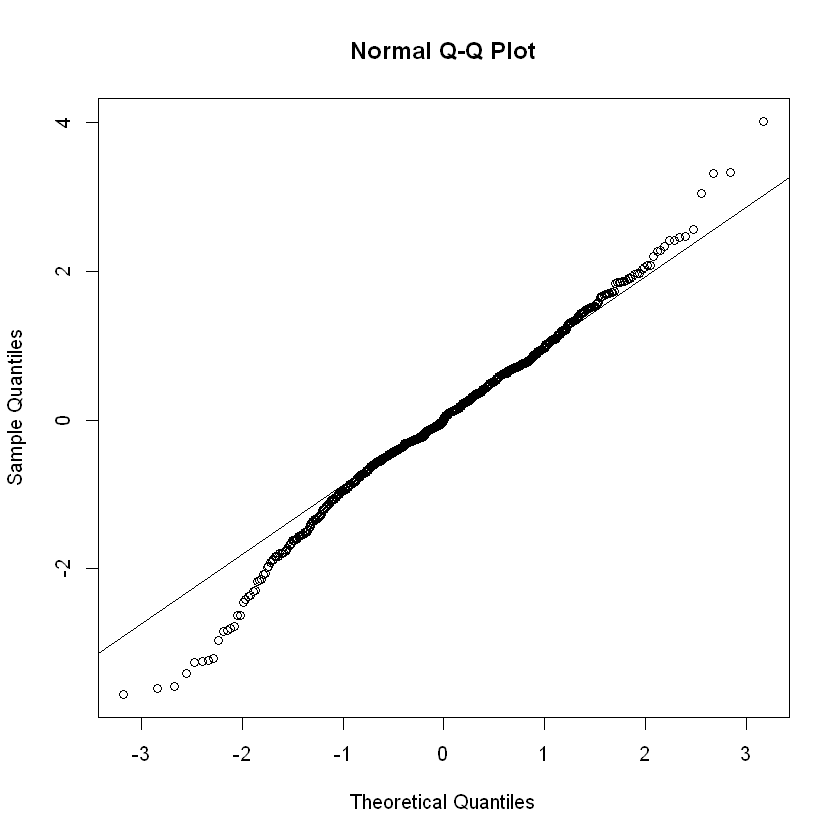

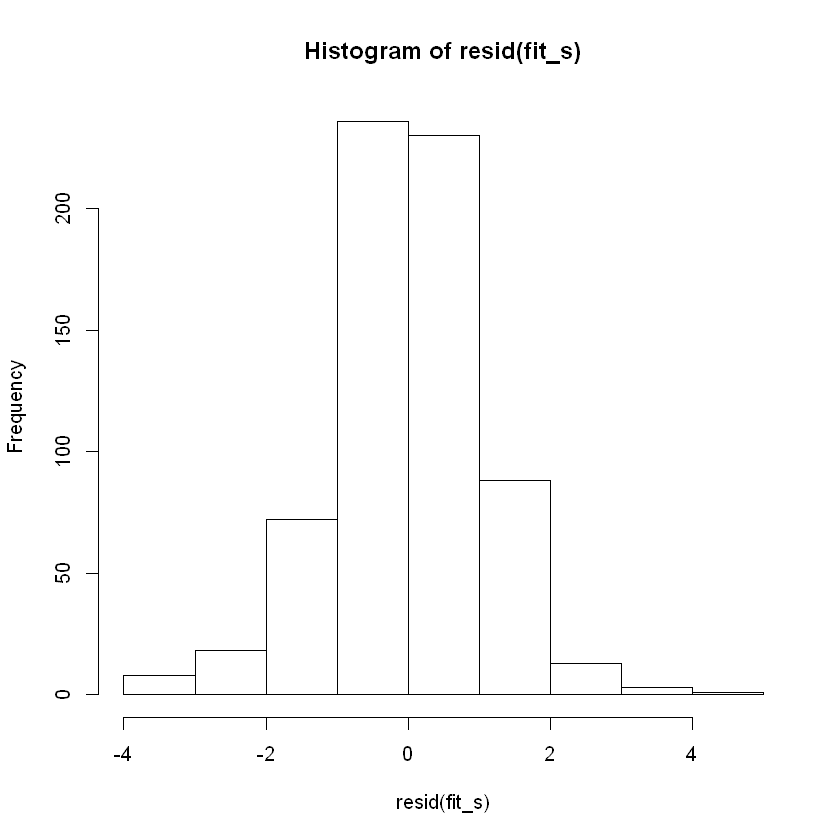

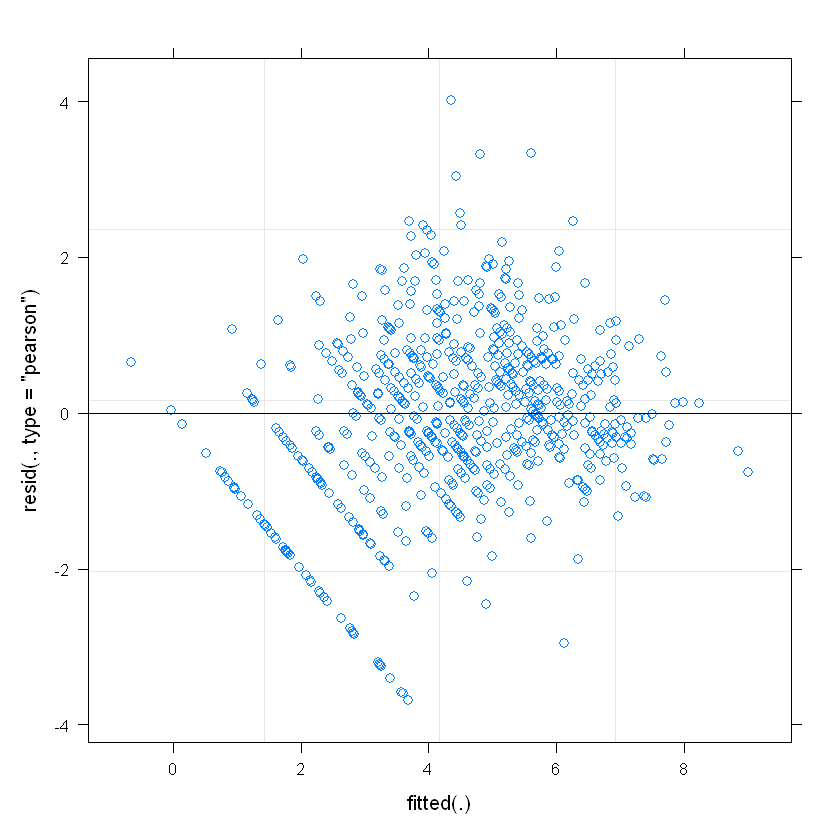

In [8]:
#penID as random effect: singular values -->withouPenID
#without sqrt is worse
fit_s = lmer(sqrt(severity) ~  CLASS + date*Treatment + (1|HenID), data=df_S)
summary(fit_s)
anova(fit_s)
######normally distributed residuals
qqnorm(resid(fit_s))
qqline(resid(fit_s))
hist(resid(fit_s))
######check homogeneity of variance (residuals has constant variance)
plot(fit_s)

In [9]:
#contrast
#no correction for sqrt
#emm = emmeans(fit_s, pairwise ~ Treatment | date, adjust = "bonferroni")
#emm
#i nemmeans: P-value adjustments are applied to each by group, and there is only one comparison - hence no multiplicity - 
#in each group. And no annotation about adjustments is shown when no adjustments are made.
#fit_s.rg <- ref_grid(fit_s)
#emm <- emmeans(regrid(fit_s.rg), pairwise ~ Treatment | date)
#summary(emm) #no crreaction but ame as *4 then: 
fit_s.rg = ref_grid(fit_s)
emm = emmeans(regrid(fit_s.rg), specs =~ Treatment | date)
df_res = summary(pairs(emm), by = NULL, adjust = "bonf")
df_res
write.csv(df_res, file=file.path(path_save, paste0('OFH_KBF_posthoc.csv')) )
df_res = confint(emm)
df_res
write.csv(df_res, file=file.path(path_save, paste0('OFH_KBF_posthocmeans.csv')) )

,contrast,date,estimate,SE,df,t.ratio,p.value
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,TRAN - OFH,2021-01-04,-5.634230,1.851573,241.6622,-3.042942,0.01040608
2,TRAN - OFH,2021-02-01,-3.617556,2.112289,234.6149,-1.712624,0.35241175
3,TRAN - OFH,2021-04-12,-5.742935,2.704824,234.5675,-2.123219,0.13913204
4,TRAN - OFH,2021-07-25,-3.393847,3.357732,242.6474,-1.010756,1.00000000


,Treatment,date,response,SE,df,lower.CL,upper.CL
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,TRAN,2021-01-04,8.062525,1.200293,241.6622,5.698153,10.42690
2,OFH,2021-01-04,13.696755,1.546192,245.1319,10.651237,16.74227
3,TRAN,2021-02-01,13.231743,1.502352,234.6149,10.271920,16.19157
4,OFH,2021-02-01,16.849299,1.675349,238.0361,13.548896,20.14970
5,TRAN,2021-04-12,21.791439,1.929855,234.5675,17.989376,25.59350
6,OFH,2021-04-12,27.534375,2.141527,238.1145,23.315615,31.75313
7,TRAN,2021-07-25,33.687500,2.462636,242.6474,28.836627,38.53837
8,OFH,2021-07-25,37.081348,2.563444,248.9156,32.032543,42.13015


# Feather damage

[1] 844   8

[1] 506   8

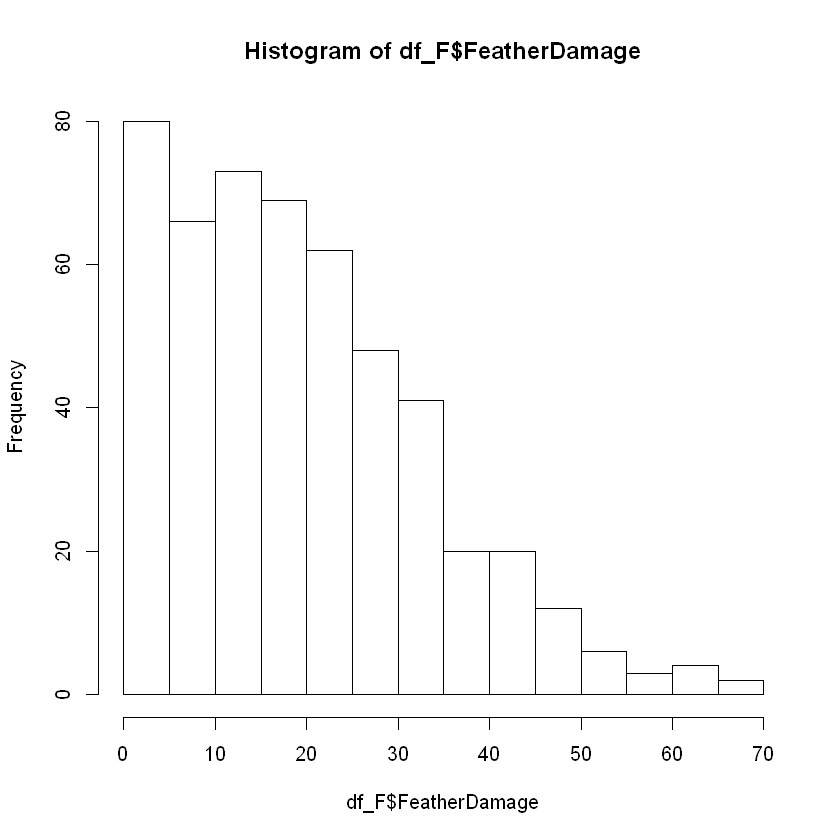

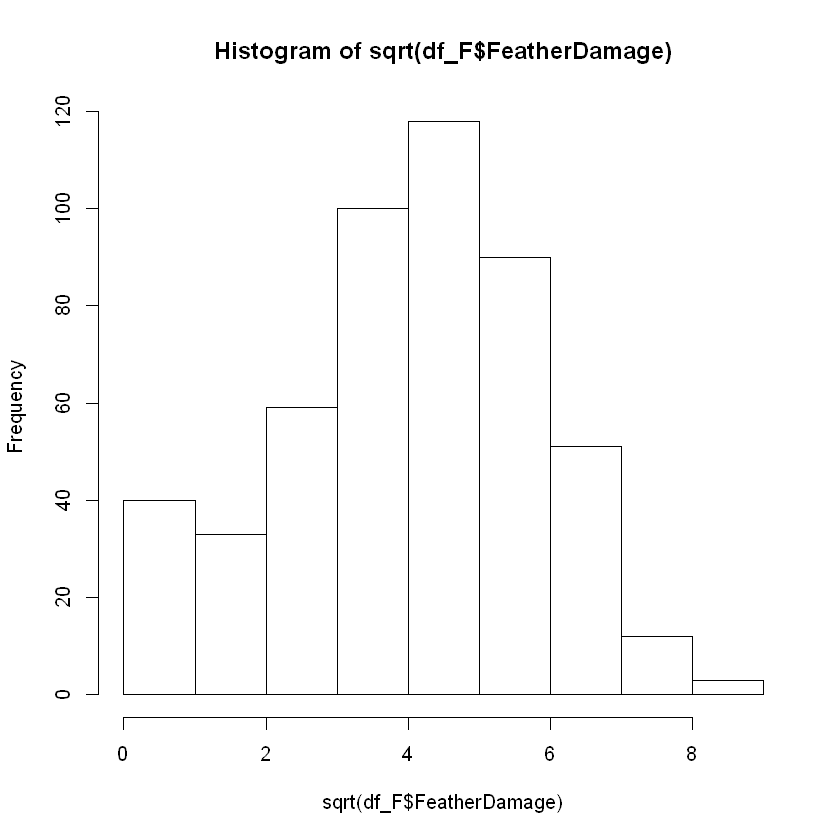

In [10]:
dim(df)
df_F = df[(!is.na(df$FeatherDamage))&(df$DOA>230),]
dim(df_F)
hist(df_F$FeatherDamage)
hist(sqrt(df_F$FeatherDamage))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: FeatherDamage ~ CLASS + date * Treatment + (1 | PenID/HenID)
   Data: df_F

REML criterion at convergence: 3614.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.2653 -0.5598 -0.0121  0.5023  3.2047 

Random effects:
 Groups      Name        Variance Std.Dev.
 HenID:PenID (Intercept) 43.320   6.582   
 PenID       (Intercept)  1.705   1.306   
 Residual                49.237   7.017   
Number of obs: 506, groups:  HenID:PenID, 194; PenID, 8

Fixed effects:
                            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)                   9.0213     1.2727  13.4197   7.088 6.87e-06 ***
CLASSLEXP                    -1.9523     1.5961 176.2162  -1.223    0.223    
CLASSMEXP                     0.7956     1.4526 175.4090   0.548    0.585    
date2021-04-12                6.9683     1.0877 336.0515   6.406 5.03e-10 ***
date2021-07-25               25.3658  

,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
CLASS,108.91512,54.45756,2,174.635201,1.1060269,3.331773e-01
date,48852.83279,24426.41639,2,330.478971,496.0977453,2.983650e-100
Treatment,17.33088,17.33088,1,6.058945,0.3519881,5.744533e-01
date:Treatment,242.11444,121.05722,2,330.596084,2.4586584,8.711270e-02


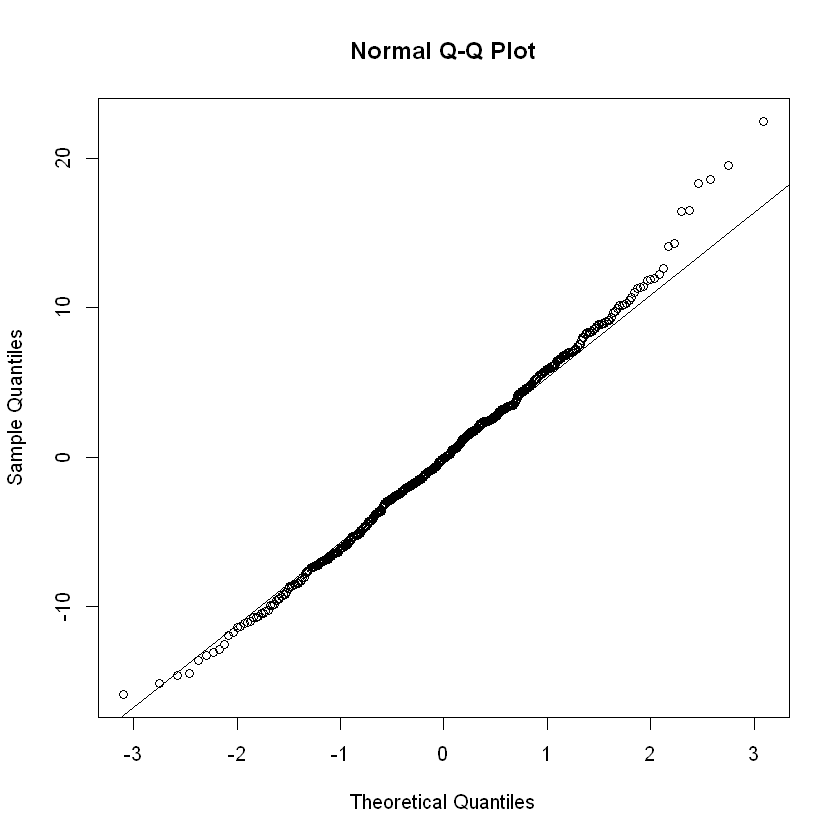

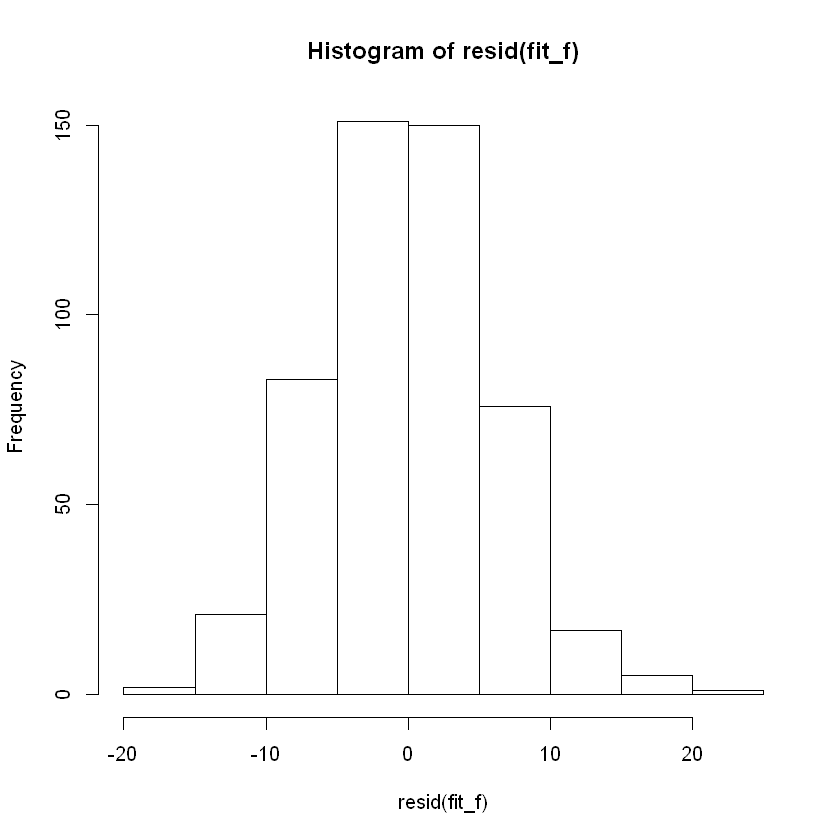

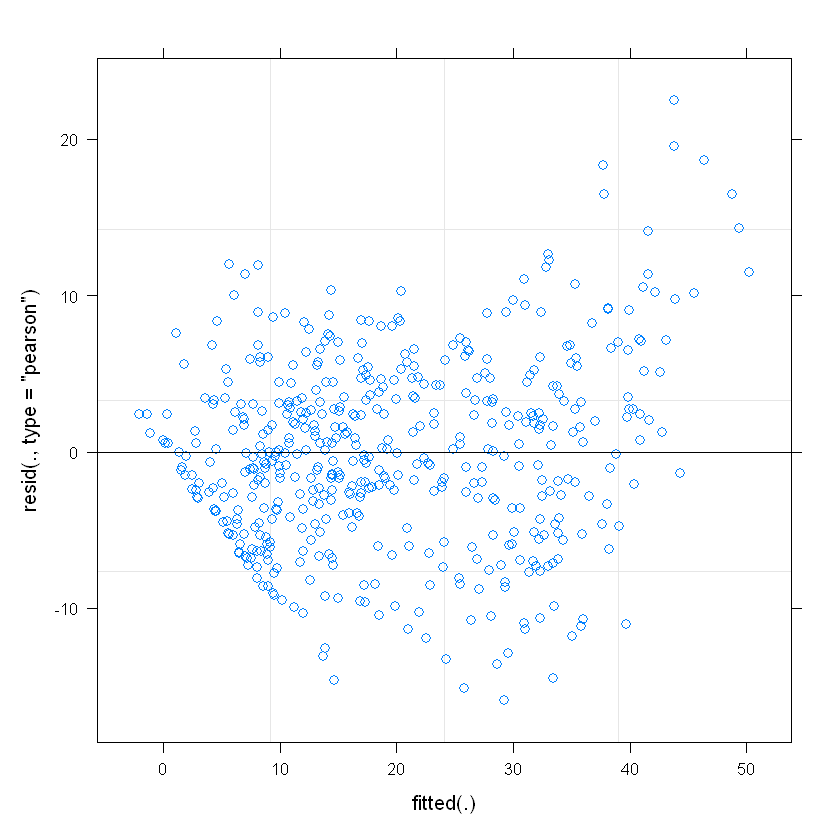

In [11]:
#histogram of residuals looks bad with sqrt()
#penID as random effect: singular values -->withouPenID
fit_f = lmer(FeatherDamage ~  CLASS + date*Treatment + (1|PenID/HenID), data=df_F)
summary(fit_f)
anova(fit_f)
######normally distributed residuals
qqnorm(resid(fit_f))
qqline(resid(fit_f))
hist(resid(fit_f))
######check homogeneity of variance (residuals has constant variance)
plot(fit_f)

# Weight

[1] 1121   10

,HenID,Treatment,CLASS,PenID,R.Pen,variable,weight,date,DOA,weight_norm
,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<int>,<dbl>
1,hen_46,TRAN,REXP,pen_10,2,10-12 juin weight,63.6,2020-06-10,7,0.4702194
2,hen_17,OFH,LEXP,pen_5,1,10-12 juin weight,60.4,2020-06-10,7,0.3699060
3,hen_161,TRAN,REXP,pen_10,4,10-12 juin weight,66.7,2020-06-10,7,0.5673981


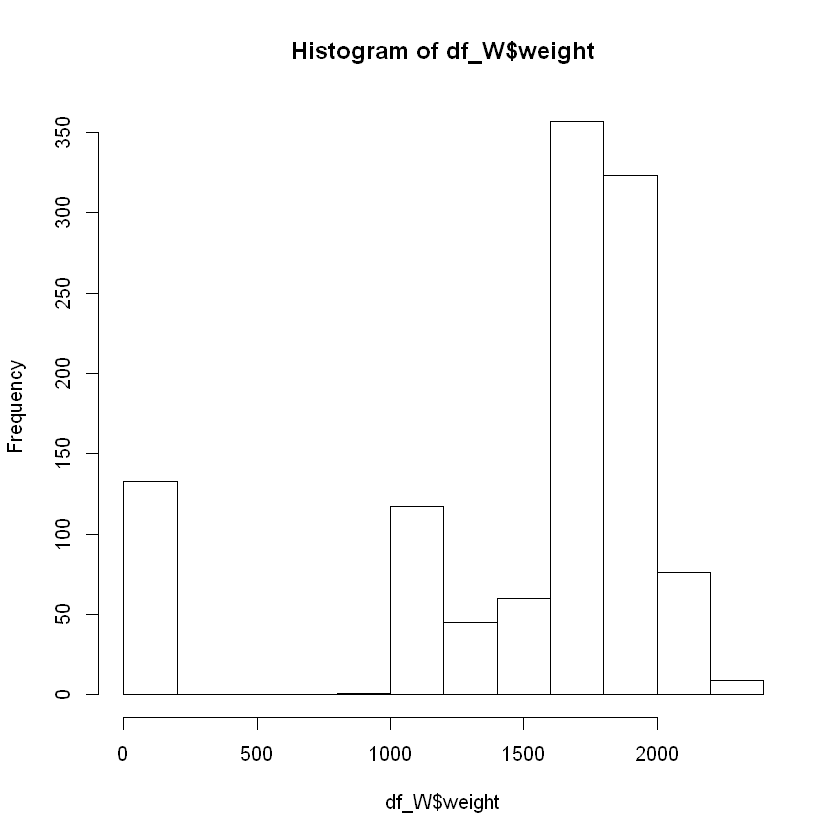

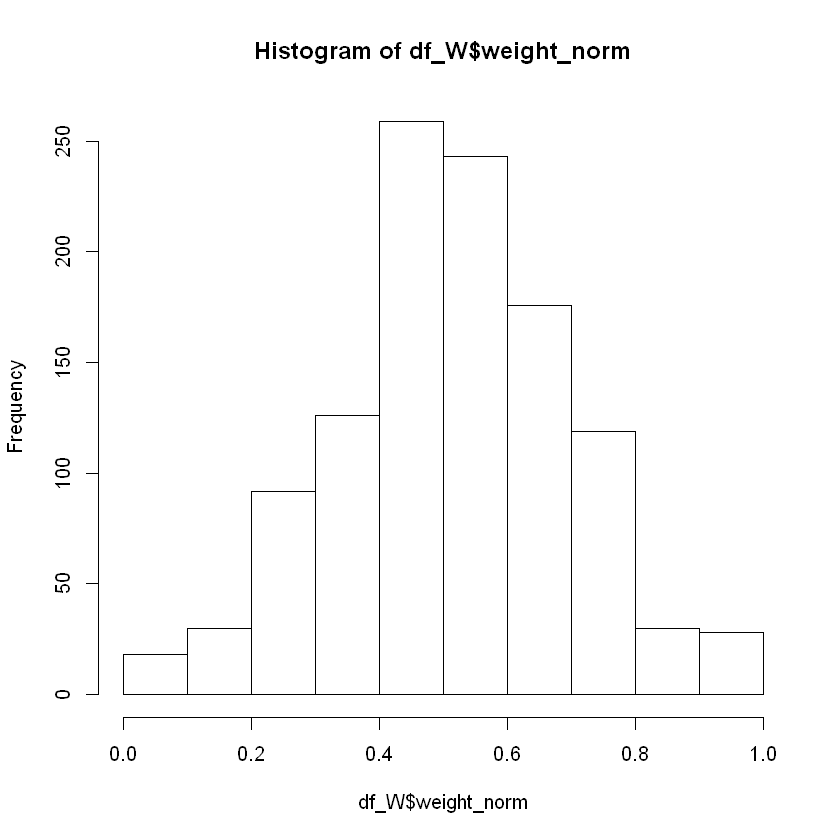

In [12]:
#focal birds information (one row per focal bird)
path_ = 'G:/VPHI/Welfare/2- Research Projects/OFHE2.OriginsE2/DataOutput/TrackingSystem/ALLDATA_'
#df_W = read.csv(file.path(path_,'df_W_daily_aggregatedHA.csv'), header = TRUE, sep = ",")
df_W = read.csv(file.path(path_,'OFH_df_FOCALBIRDS.csv'), header = TRUE, sep = ",")
df_W$HenID = as.factor(df_W$HenID)   
df_W$PenID = as.factor(df_W$PenID)
df_W$CLASS = as.factor(df_W$CLASS) 
df_W$date = as.factor(df_W$date) 
df_W$DOA = as.integer(df_W$DOA) 
df_W$Treatment = as.factor(df_W$Treatment)
df_W = df_W %>% mutate(CLASS = relevel(CLASS, ref = "REXP"))
df_W = df_W %>% mutate(Treatment = relevel(Treatment, ref = "TRAN"))
#df_W$dateTreatment = interaction(df_W$DOA, df_W$Treatment) #new as one DOA less for the feather!
#df_W$dateTreatment = as.factor(df_W$dateTreatment)
dim(df_W)
df_W = df_W[!is.na(df_W$DOA),]
head(df_W,3)
hist(df_W$weight)
hist(df_W$weight_norm)

In [13]:
#penID as random effect: singular values -->withouPenID
fit = lmer(weight_norm ~ CLASS + date*Treatment + (1|PenID/HenID), data=df_W)
summary(fit)

boundary (singular) fit: see ?isSingular


Correlation matrix not shown by default, as p = 16 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: weight_norm ~ CLASS + date * Treatment + (1 | PenID/HenID)
   Data: df_W

REML criterion at convergence: -1179.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.3717 -0.4501 -0.0350  0.4490  3.9337 

Random effects:
 Groups      Name        Variance  Std.Dev. 
 HenID:PenID (Intercept) 1.750e-02 1.323e-01
 PenID       (Intercept) 1.330e-12 1.153e-06
 Residual                1.262e-02 1.123e-01
Number of obs: 1121, groups:  HenID:PenID, 231; PenID, 8

Fixed effects:
                              Estimate Std. Error         df t value Pr(>|t|)
(Intercept)                   0.497873   0.019461 601.968234  25.583  < 2e-16
CLASSLEXP                    -0.010909   0.027641 208.380324  -0.395  0.69350
CLASSMEXP                     0.010540   0.025142 208.775989   0.419  0.67548
date2020-09-29               -0.013738   0.018149 885.040289  -0.757  0.44929
date2020-11-23                


Correlation matrix not shown by default, as p = 16 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: weight_norm ~ CLASS + date * Treatment + (1 | HenID)
   Data: df_W

REML criterion at convergence: -1179.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.3717 -0.4501 -0.0350  0.4490  3.9337 

Random effects:
 Groups   Name        Variance Std.Dev.
 HenID    (Intercept) 0.01750  0.1323  
 Residual             0.01262  0.1123  
Number of obs: 1121, groups:  HenID, 231

Fixed effects:
                              Estimate Std. Error         df t value Pr(>|t|)
(Intercept)                   0.497873   0.019461 601.968522  25.583  < 2e-16
CLASSLEXP                    -0.010909   0.027641 208.380280  -0.395  0.69350
CLASSMEXP                     0.010540   0.025142 208.775946   0.419  0.67548
date2020-09-29               -0.013738   0.018149 885.040307  -0.757  0.44929
date2020-11-23                0.050203   0.018198 905.287700   2.759  0.00592
date2021-01-04               -0.03

,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
CLASS,0.005168386,0.002584193,2,207.5352,0.2048248,8.149546e-01
date,3.022881863,0.503813644,6,908.3756,39.9325861,3.071876e-43
Treatment,0.021457162,0.021457162,1,226.5031,1.7007082,1.935191e-01
date:Treatment,0.118528435,0.019754739,6,908.5446,1.5657730,1.539689e-01


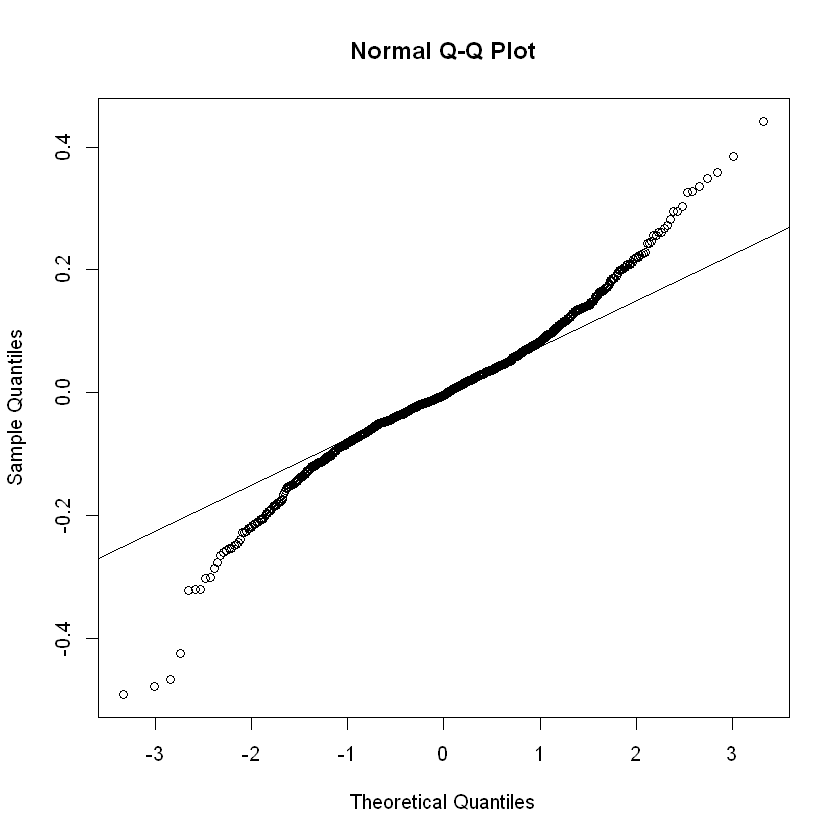

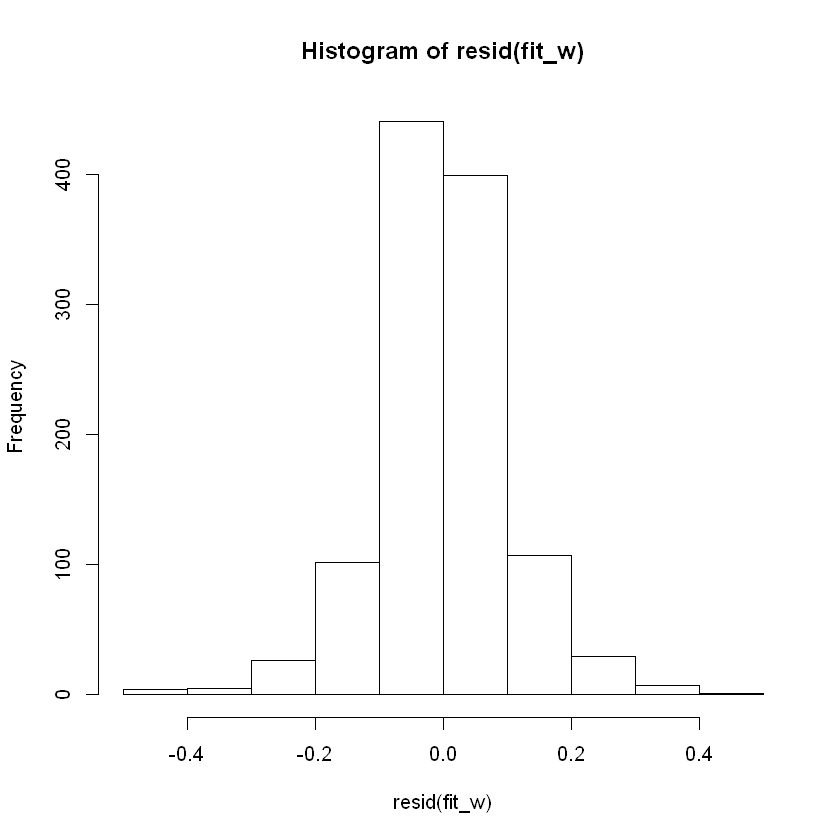

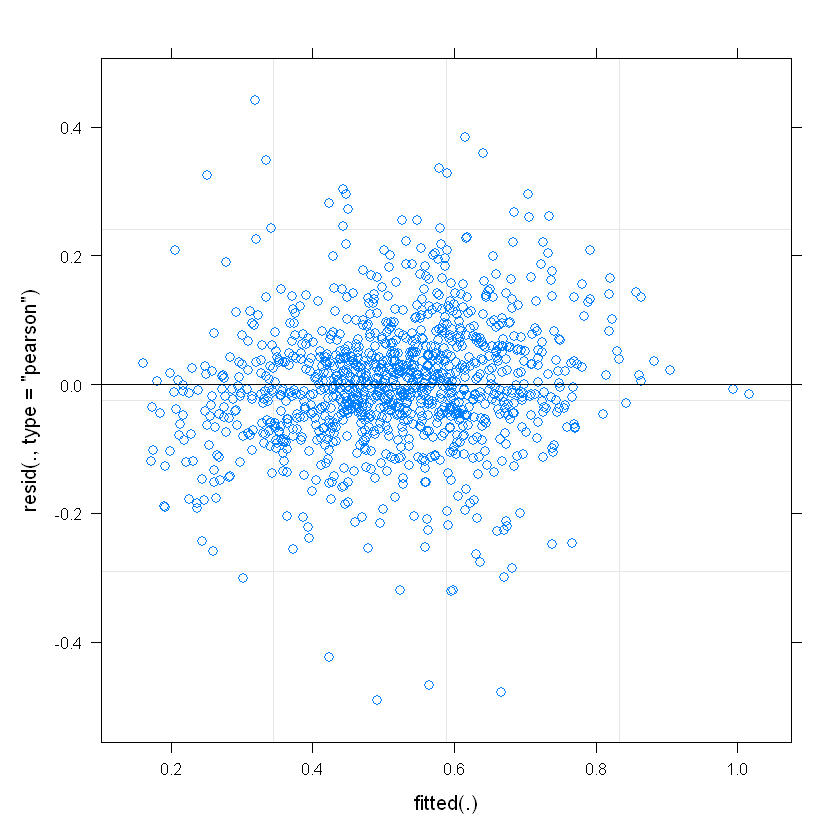

In [14]:
#penID as random effect: singular values -->withouPenID
#sqrt is worst and lead to same result
#scale(DOA): same results but nor more emmeans
fit_w = lmer(weight_norm ~ CLASS + date*Treatment + (1|HenID), data=df_W)
summary(fit_w)
anova(fit_w)
######normally distributed residuals
qqnorm(resid(fit_w))
qqline(resid(fit_w))
hist(resid(fit_w))
######check homogeneity of variance (residuals has constant variance)
plot(fit_w)

In [16]:
tab_model(c(fit_s, fit_f,fit_w), collapse.ci = TRUE, p.style = "numeric_stars", file=file.path(path_save,'Models_HA.doc'))